In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
#First Commit

Automatically created module for IPython interactive environment
Feature ranking:
1. feature 9 (0.070643)
2. feature 3 (0.060250)
3. feature 6 (0.057904)
4. feature 19 (0.054016)
5. feature 0 (0.049957)
6. feature 21 (0.049160)
7. feature 14 (0.049040)
8. feature 4 (0.047459)
9. feature 18 (0.045806)
10. feature 16 (0.044746)
11. feature 2 (0.044376)
12. feature 1 (0.044187)
13. feature 8 (0.043333)
14. feature 10 (0.043079)
15. feature 17 (0.042420)
16. feature 20 (0.038273)
17. feature 11 (0.037720)
18. feature 5 (0.037692)
19. feature 12 (0.037122)
20. feature 15 (0.035325)
21. feature 7 (0.035153)
22. feature 13 (0.032340)


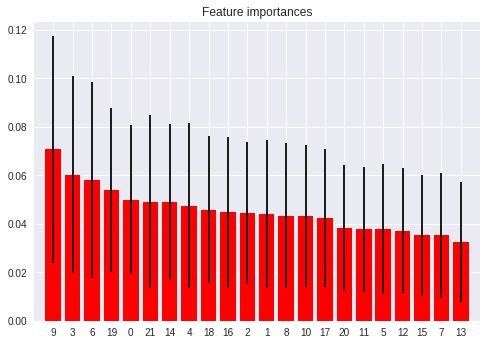

In [108]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier
df_14_15 = pd.read_csv('season_stats/2014-2015_season_stats.csv')
df_15_16 = pd.read_csv('season_stats/2015-2016_season_stats.csv')
df_16_17 = pd.read_csv('season_stats/2016-2017_season_stats.csv')

dfEast = df_14_15[:15]
dfEast2 = df_15_16[:15]
dfEast3 = df_16_17[:15]

dfWest = df_14_15[15:]
dfWest2 = df_15_16[15:]
dfWest3 = df_16_17[15:]

dfEastFinal = pd.concat([dfEast, dfEast2,dfEast3], ignore_index=True)
dfWestFinal = pd.concat([dfWest,dfWest2,dfWest3], ignore_index=True)
dfAll = pd.concat([dfWestFinal,dfEastFinal], ignore_index=True)
X=[]
y=[]
#mudar aqui o df para ajustar melhor o modelo à conferencia ou para todos
for r in dfAll.itertuples():
    aux=[]
    for i in range(4,26):
        aux.append(r[i])
    X.append(aux)
    if(r.POS<5):
        y.append('top playoff')
    elif(r.POS<9):
        y.append('bot playoff')
    elif(r.POS<12):
        y.append('almost playoff')
    else:
        y.append('worst teams')


# Build a forest and compute the feature importances
# Change parameter here to change number of forests
forest = ExtraTreesClassifier(n_estimators=1000,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(X[0])):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(X[0])), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(len(X[0])), indices)
plt.xlim([-1, len(X[0])])
plt.show()

# f=forest.predict([[240.0,41.6,86.8,0.479,10.0,25.4,0.395,31.6,61.4,0.514,15.2,19.6,0.774,9.0,33.4,42.4,23.3,8.0,4.6,14.3,18.5,108.4]])
# print(f)

#lembrar que a contagem abaixo começa em minutes played com esse sendo 0. Minutes played está sendo desconsiderado

#Mais importantes para o leste:
#50 trees ->(9,19,6,3,10,21)
#100 trees ->(9,3,19,6,21,10)
#200 trees ->(9,19,6,3,10,21)
#500 trees ->(9,19,3,6,10,21)
#1000 trees ->(9,19,3,10,6,21)

#Mais importantes para o oeste:
#50 trees ->(18,4,6,21,10,16)
#100 trees ->(18,3,6,9,4,14)
#200 trees ->(18,9,3,6,4,14)
#500 trees ->(18,9,3,6,16,19)
#1000 trees ->(18,9,3,6,16,4)

#Mais importantes Gerais:
#50 trees ->(9,6,3,21,19,2)
#100 trees ->(9,3,6,19,21,4)
#200 trees ->(9,6,3,19,4,21)
#500 trees ->(9,6,3,19,21,14)
#1000 trees ->(9,3,6,19,21,14)

#Os que basicamente aparecem como consenso sao 9(2P%), 3(FG%) e 6(3PT%)
#Outros como 19(TOV) e 21(PTS) também aparecem bastante

#Vale notar a diferença entre as conferências, já que na oeste o 18(BLk) aparece como unanimidade como mais importante
#enquanto para a leste ele não aparece nem no top 6. Para outros como 16(AST),14(DRB) e 4(3PT) isso também acontece.
#O mesmo se aplica quando se invertem as conferências.

In [ ]:
#Fazer plot de regressao linear considerando o top 5 ou 6 mais importante de acordo com o random forest
#Fazer a tabela que tem p-value,coef,SE e t usando o top5 ou 6 mais importante de acordo com o random forest